In [106]:
%matplotlib inline
from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [107]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [108]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [109]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# print(engine)

In [110]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [111]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [112]:
# Save references to each table
Measurement = Base.classes.measurement
Station=Base.classes.station

In [113]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [114]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7eee680c10>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01'}

In [115]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7eee6f1be0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [116]:
#
session.query(Measurement.station, func.max(Measurement.date)).group_by(Measurement.station).all()


[('USC00511918', '2015-10-30'),
 ('USC00513117', '2017-07-31'),
 ('USC00514830', '2017-08-23'),
 ('USC00516128', '2017-08-23'),
 ('USC00517948', '2017-07-31'),
 ('USC00518838', '2015-11-20'),
 ('USC00519281', '2017-08-18'),
 ('USC00519397', '2017-08-23'),
 ('USC00519523', '2017-08-23')]

In [117]:
# Total dates
session.query(Measurement.station,func.min(Measurement.date)).group_by(Measurement.station).all()

[('USC00511918', '2010-01-01'),
 ('USC00513117', '2010-01-01'),
 ('USC00514830', '2010-03-01'),
 ('USC00516128', '2010-01-01'),
 ('USC00517948', '2010-05-03'),
 ('USC00518838', '2010-01-01'),
 ('USC00519281', '2010-01-01'),
 ('USC00519397', '2010-01-01'),
 ('USC00519523', '2010-01-01')]

In [118]:
# The most resent date
session.query(Measurement.station, Measurement.prcp, Measurement.date).order_by(Measurement.date.desc()).first()

('USC00519397', 0.0, '2017-08-23')

In [119]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [120]:
# Calculate the date one year from the last date in data set.
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year from the last date: ", year_before)



One year from the last date:  2016-08-23


In [121]:
# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [122]:
#prc=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
#dict_prc=[]
#for i in range(0, len(prc)):
    #dict_prc.append({prc[i][0]: prc[i][1]})
#dict_prc

In [123]:
#len(dict_prc)

In [124]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
st_prcp=session.query(Measurement.station, Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
st_df=pd.DataFrame(st_prcp)
df=pd.DataFrame(prcp)
df= df.reset_index(drop=True, inplace=False)
st_df= st_df.reset_index(drop=True, inplace=False)
df=df.dropna()
st_df=st_df.dropna()
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [125]:
df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


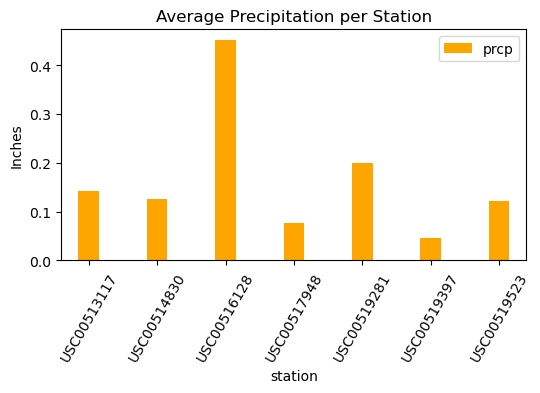

In [126]:
# Use Pandas Plotting with Matplotlib to plot the data

station = st_df.groupby(st_df['station'])['prcp'].mean()
station.plot(kind='bar',figsize=(6,3), width=0.3, fontsize=10, color='Orange', legend="prcp",  rot=60)
plt.title("Average Precipitation per Station", fontsize=12)
plt.xlabel("station", fontsize=10)
plt.ylabel("Inches", fontsize=10)
plt.show()


In [127]:
#axis=df.groupby(pd.Grouper(freq='MS', key='date')).sum().reset_index()

#axis

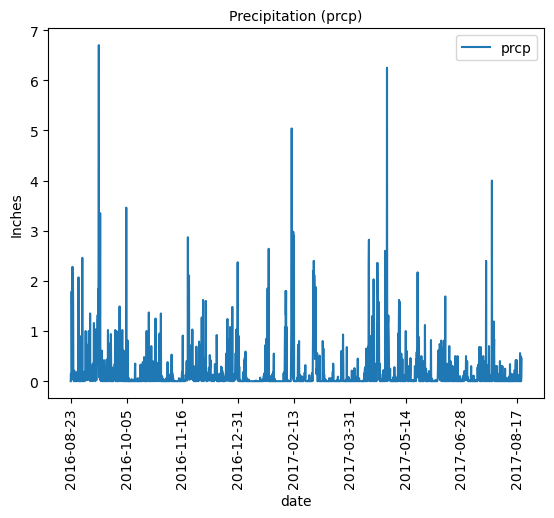

In [128]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x='date', y='prcp', rot=90)
plt.title("Precipitation (prcp)", fontsize=10)
plt.ylabel("Inches", fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.show()


In [129]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [130]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7eee6f1be0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [131]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [132]:
session.query(Measurement.station).count()

19550

In [133]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()


[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [134]:
t=session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()
stations=list(np.ravel(t))
stations

['USC00518838',
 'USC00517948',
 'USC00511918',
 'USC00514830',
 'USC00516128',
 'USC00519523',
 'USC00513117',
 'USC00519397',
 'USC00519281']

In [135]:
# Using the most active station id from the previous query, calculate the lowest, 
# highest, and average temperature.
min=session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
max=session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
mean=session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f'min temp={min}, max temp  ={max}, mean temp ={mean}')

min temp=[('USC00519281', 54.0)], max temp  =[('USC00519281', 85.0)], mean temp =[('USC00519281', 71.66378066378067)]


In [136]:
session.query(Measurement.station, func.max(Measurement.date)).group_by(Measurement.station).filter(Measurement.station=='USC00519281').all()

[('USC00519281', '2017-08-18')]

In [137]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp=session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= '2016-08-18').order_by(Measurement.date).all()

df1=pd.DataFrame(temp)
#df1= df1.reset_index(drop=True, inplace=False)
df1=df1.dropna()
df1.count()


date    357
tobs    357
dtype: int64

In [138]:
#temp
#list_temp=[]
#for i in range(0, len(temp)):
        #list_temp.append({temp[i][0]: temp[i][1]})

#list_temp

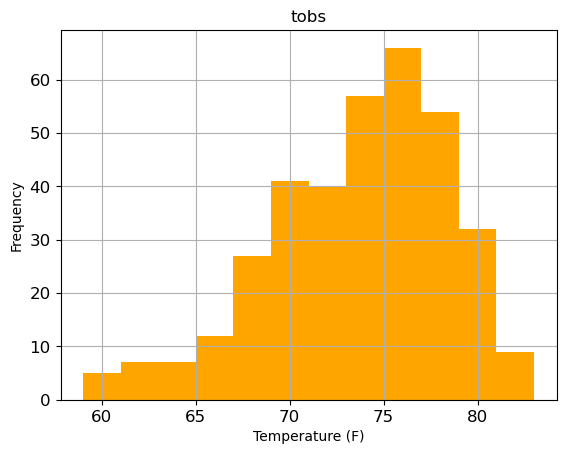

In [139]:
hist=df1.hist('tobs', grid= True, 
xlabelsize=12, xrot=None, ylabelsize=12, yrot=0, 
ax=None, sharex=False, sharey=False, figsize=None, layout=None, 
bins=12, backend= None, color='orange')
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.show()


In [140]:
#start='2016-11-11'
#temp_min=session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').filter(Measurement.date >= start).all()
#temp_avg=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').filter(Measurement.date >= start).all()
#temp_max=session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').filter(Measurement.date >= start).all()
#temp_dic={}
#temp_dic['Temperature_min']=[x[0] for x in temp_min]
#temp_dic['Temperature_average']=[x[0] for x in temp_avg]
#temp_dic['Temperature_max']=[x[0] for x in temp_max]

#temp_dic={'Temperature_min': temp_min, 'Temperature_average': temp_avg, 'Temperature_max': temp_max}
#temp_dic

# Close session

In [145]:
#Close Session
session.close()